In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras

print(tf.__version__)


2.7.0


In [ ]:
#viewing tf datasets
#https://www.tensorflow.org/datasets/overview
tfds.list_builders()

In [9]:
#dataset info
builder = tfds.builder('rock_paper_scissors')
dsinfo = builder.info
print(dsinfo)

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='C:\\Users\\domin\\tensorflow_datasets\\rock_paper_scissors\\3.0.0',
    download_size=Unknown size,
    dataset_size=Unknown size,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


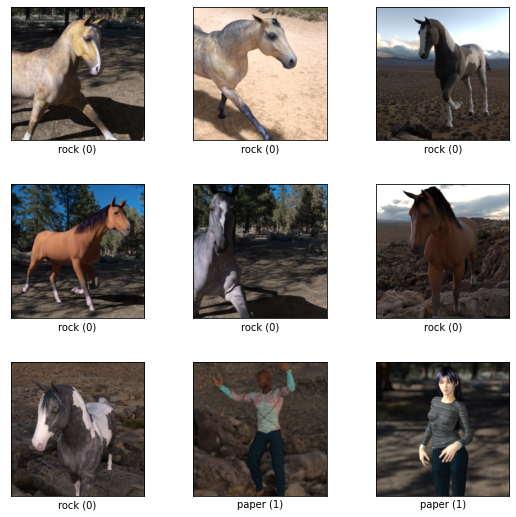

In [11]:
#dataprep/load + dataset example
training_ds = tfds.load(name="horses_or_humans", split="train")
testing_ds = tfds.load(name="horses_or_humans", split="test")

example_ds = tfds.show_examples(dsinfo, training_ds)

In [31]:
#
training_images = np.array([example['image'].numpy()[:,:,0] for example in training_ds])
#training_images.shape #total images, shape, shape, rbg
training_labels = np.array([example['label'].numpy() for example in training_ds])

testing_images = np.array([example['image'].numpy()[:,:,0] for example in testing_ds])
#testing_images.shape #total images, shape, shape, rbg
testing_labels = np.array([example['label'].numpy() for example in testing_ds])

In [26]:
training_images = training_images.reshape(1027, 300, 300, 1).astype('float32')
testing_images = testing_images.reshape(256, 300, 300, 1).astype('float32')

training_images /= 255
testing_images /= 255

#training_images.dtype
#training_images[0]
#training_images.shape

dtype('float32')

In [34]:
#sequential network
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'), 
    keras.layers.Dense(256, activation='relu'),
    #keras.layers.Dense(256, input_shape=(300,300,1), activation='relu'), keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, batch_size=32)

Epoch 1/5
33/33 [==============================] - 6s 178ms/step - loss: 7389.9526 - accuracy: 0.5190
Epoch 2/5
33/33 [==============================] - 5s 161ms/step - loss: 836.7057 - accuracy: 0.6543
Epoch 3/5
33/33 [==============================] - 5s 160ms/step - loss: 559.2559 - accuracy: 0.7059
Epoch 4/5
33/33 [==============================] - 5s 160ms/step - loss: 280.2742 - accuracy: 0.7498
Epoch 5/5
33/33 [==============================] - 5s 159ms/step - loss: 280.8102 - accuracy: 0.7108


In [36]:
model.evaluate(testing_images, testing_labels)

8/8 [==============================] - 0s 32ms/step - loss: 356.6628 - accuracy: 0.7070


[356.662841796875, 0.70703125]

In [39]:
#CNN network
model = keras.Sequential([
    keras.layers.Conv2D(64,3,activation='relu', input_shape=(300,300,1)),
    keras.layers.Conv2D(32,3,activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, batch_size=32)

Epoch 1/10
33/33 [==============================] - 114s 3s/step - loss: 1172.6837 - accuracy: 0.6972
Epoch 2/10
33/33 [==============================] - 108s 3s/step - loss: 0.2356 - accuracy: 0.9455
Epoch 3/10
33/33 [==============================] - 112s 3s/step - loss: 0.0320 - accuracy: 0.9922
Epoch 4/10
33/33 [==============================] - 112s 3s/step - loss: 0.0104 - accuracy: 0.9981
Epoch 5/10
33/33 [==============================] - 115s 3s/step - loss: 0.0022 - accuracy: 0.9990
Epoch 6/10
33/33 [==============================] - 114s 3s/step - loss: 2.5767e-04 - accuracy: 1.0000
Epoch 7/10
33/33 [==============================] - 114s 3s/step - loss: 1.3538e-04 - accuracy: 1.0000
Epoch 8/10
33/33 [==============================] - 113s 3s/step - loss: 9.3756e-05 - accuracy: 1.0000
Epoch 9/10
33/33 [==============================] - 112s 3s/step - loss: 7.1347e-05 - accuracy: 1.0000
Epoch 10/10
33/33 [==============================] - 112s 3s/step - loss: 5.7514e-05 - acc

In [40]:
model.evaluate(testing_images, testing_labels)

8/8 [==============================] - 4s 482ms/step - loss: 8.6647 - accuracy: 0.8125


[8.664679527282715, 0.8125]